<a href="https://colab.research.google.com/github/ali-kmirzaei/NN-and-DL/blob/main/cfar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install livelossplot

In [1]:
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential #FeedForward
from tensorflow.keras.layers import Input, Dense, Dropout, Conv2D, MaxPooling2D, Flatten, BatchNormalization
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.utils import to_categorical
from livelossplot import PlotLossesKeras

In [ ]:
# load dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

x_train = (x_train.astype(float)-128) / 127.
x_test  = (x_test.astype(float)-128) / 127.

# Convert class vectors to binary class matrices.
num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 10)

In [5]:
def grad_decay(LEARNING_RATE, DECAY_RATE, EPOCHES):
    return ( 1 / ( 1 + DECAY_RATE * EPOCHES ) ) * LEARNING_RATE

In [6]:
def add_layer(model, activation_function, batch_normalization, num_of_neurons):
  model.add(Dense(num_of_neurons, activation=activation_function))
  if batch_normalization : model.add(BatchNormalization())

In [21]:
# Model:
def main(activation_function, batch_normalization, num_of_layers):
  EPOCHES = 1000
  LEARNING_RATE = 0.001
  BATCH_SIZE = 2048
  METRICS = ['accuracy']
  LOSS = 'categorical_crossentropy'
  VALIDATION_DATA = (x_test, y_test)

  model = Sequential()
  model.add(Input(shape=x_test[0].shape))
  model.add(Flatten())


  lrange = 2
  num_of_neurons = 1024
  for i in range(lrange):
    add_layer(model, activation_function, batch_normalization, num_of_neurons)
    add_layer(model, activation_function, batch_normalization, num_of_neurons)
    add_layer(model, activation_function, batch_normalization, num_of_neurons)
    num_of_neurons = int(num_of_neurons / 2)


  model.add(Dense(10 , activation=activation_function))

  LEARNING_RATE = 0.9
  DECAY_RATE=0.96
  LEARNING_RATE = grad_decay(LEARNING_RATE, DECAY_RATE, EPOCHES)

  # opt = SGD(learning_rate = LEARNING_RATE)
  opt = Adam(
    learning_rate=LEARNING_RATE,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name='Adam'
  )
  model.compile(optimizer=opt, loss=LOSS, metrics=METRICS)
  history = model.fit(x_train, y_train, epochs=EPOCHES, batch_size=BATCH_SIZE, validation_data=VALIDATION_DATA, callbacks=[PlotLossesKeras()], verbose=0)

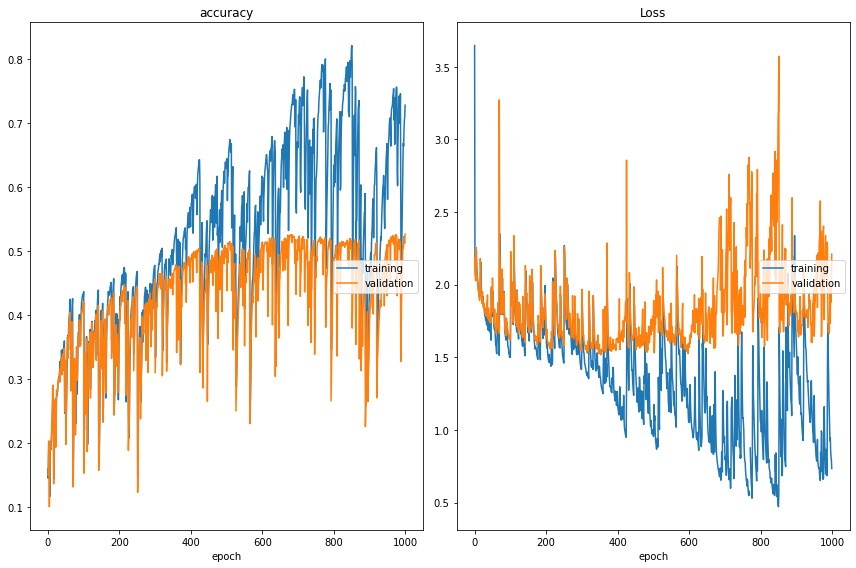

accuracy
	training         	 (min:    0.116, max:    0.821, cur:    0.728)
	validation       	 (min:    0.100, max:    0.526, cur:    0.526)
Loss
	training         	 (min:    0.471, max:    3.647, cur:    0.734)
	validation       	 (min:    1.517, max:    3.573, cur:    2.210)


In [22]:
main('relu', False, 6)

In [ ]:
test_cases = [ ('sigmoid', False, 6), ('tanh', False, 6), ('sigmoid', True, 6), ('tanh', False, 6), ('sigmoid', False, 15), ('sigmoid', True, 15) ]
# test_cases = [ ('sigmoid', False, 6), ('tanh', False, 15) ]
num = len(test_cases)-1
for i in range(num):
  main(test_cases[i][0], test_cases[i][1], test_cases[i][2])
  print('------------------------------------------------------------------------------------------------------------------')
  print('next test case is: ', test_cases[i+1])
  if int(input("select (0:stop, 1:resume)")) == 0:
    break
